In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
from tensorflow.keras.optimizers import Adam

2023-09-10 19:51:48.359356: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 19:51:49.874205: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 19:52:02.067549: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/FullPrecisionInputTrainSet.csv')
df3 = pd.read_csv('/home/jieun201/sept10-makeDS15Set/FullPrecisionInputTest.csv')

X_train = df1.values
X_test = df3.values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [3]:
model = tf.keras.models.load_model('/home/jieun201/sept1_redo_full_model/my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,307
Trainable params: 2,307
Non-trainable params: 0
_________________________________________________________________


In [4]:
preds = model.predict(X_test) 
predictionsFiles =np.argmax(preds, axis=1)
pd.DataFrame(predictionsFiles).to_csv("predictionsOnUntrackedClusters.csv",header='predict', index=False)

29030/29030 [==============================] - 41s 1ms/step


In [5]:
readPredictions = pd.read_csv('predictionsOnUntrackedClusters.csv')
readPredictions.columns=['predict']
readPredictions

,predict
0,1
1,2
2,0
3,2
4,2
...,...
928944,0
928945,0
928946,0
928947,2


array([[<Axes: title={'center': 'predict'}>]], dtype=object)

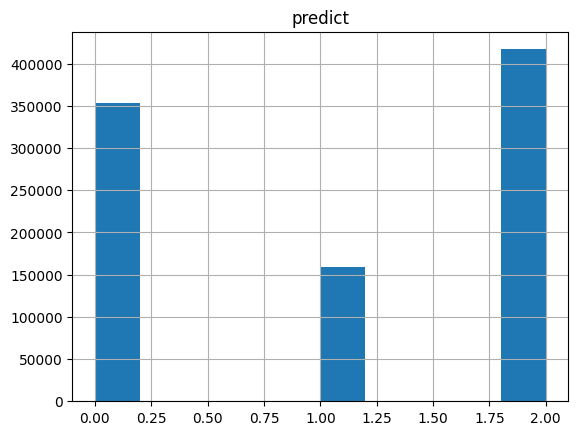

In [6]:
readPredictions.hist()

In [7]:
LowPT = readPredictions[ (readPredictions['predict'] ==1) |(readPredictions['predict'] ==2) ]
LowPT

,predict
0,1
1,2
3,2
4,2
5,1
...,...
928939,2
928940,2
928941,2
928942,2


In [9]:
575749/928949

0.6197853703486413